In [153]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

<span style="font-size:40px">Dataset Loadind and first view</span>

In [8]:
df = pd.read_csv("student_lifestyle_dataset.csv")
df.head()

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  
2  2.67          Low  
3  2.88     Moderate  
4  3.51         High

<span style="font-size:25px">Dataset Rows & Columns count</span>

In [9]:
print("shape of data", df.shape)

shape of data (2000, 8)


<span style="font-size:25px">As we can see theare are no empty records and no duplicates</span>

In [11]:
print(df.info())
print("\n")
#nNo empty records

print(df.duplicated().sum())
#No duplicated records

data = df.drop("Student_ID",axis=1)
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB
None


0


Index(['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

<span style="font-size:25px">The distributions are very good and we can see some patterns</span>

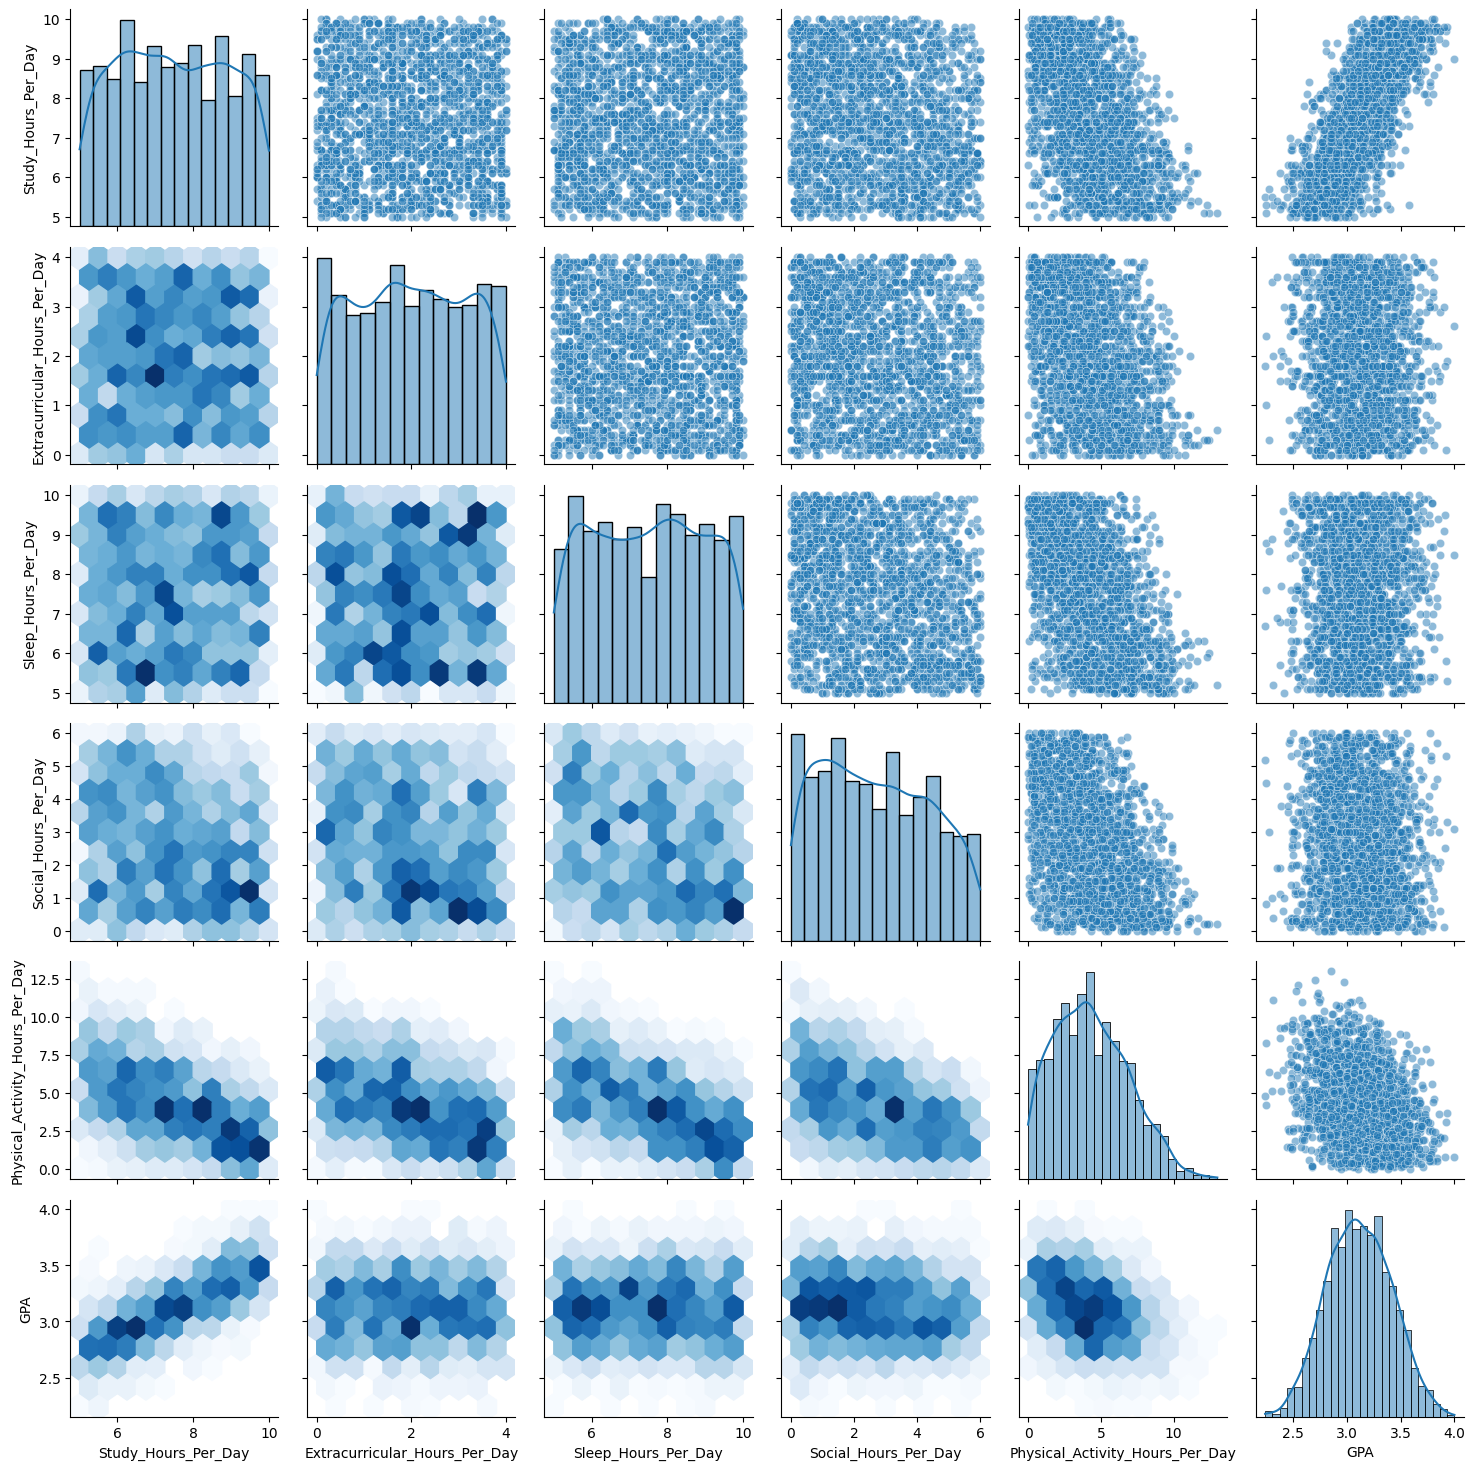

In [100]:
g = sns.PairGrid(data, diag_sharey=False)
# Upper triangle with scatterplots
g.map_upper(sns.scatterplot, alpha=0.5)
# Lower triangle with hexbins
def hexbin_func(x, y, **kwargs):
    plt.hexbin(x, y, gridsize=10, cmap='Blues', mincnt=1)
g.map_lower(hexbin_func)

# Diagonal with histograms
g.map_diag(sns.histplot, kde=True)

plt.show()

In [143]:
x = max(data["GPA"])
print(data[data["GPA"]==x])

data[(data["Study_Hours_Per_Day"]<6) & (data["GPA"]>3)].sort_values(by="GPA",ascending=False)
#only 61 wooow

    Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  Sleep_Hours_Per_Day  \
51                  9.0                            2.6                  8.5   

    Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  GPA Stress_Level  
51                   3.1                              0.8  4.0         High  


Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  Sleep_Hours_Per_Day  \
701                   5.3                            0.1                  7.8   
118                   5.2                            1.0                  8.6   
787                   5.3                            0.4                  8.0   
958                   5.9                            1.7                  5.8   
725                   5.6                            3.9                  6.1   
...                   ...                            ...                  ...   
1758                  5.1                            0.4                  7.5   
856                   5.8                            1.9                  7.8   
191                   5.9                            2.2                  9.4   
911                   5.0                            1.6                  6.2   
350                   5.6                            0.8                  9.4   

      Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day   GPA Stress_Level  
701                    2.6                              8.2  3.58          Low  
118                    5.4                              3.8  3.40          Low  
787                    2.0                              8.3  3.37          Low  
958                    4.2                              6.4  3.32         High  
725                    0.4                              8.0  3.32          Low  
...                    ...                              ...   ...          ...  
1758                   4.1                              6.9  3.01          Low  
856                    3.4                              5.1  3.01          Low  
191                    4.4                              2.1  3.01          Low  
911                    4.9                              6.3  3.01          Low  
350                    3.9                              4.3  3.01          Low  

[61 rows x 7 columns]

<span style="font-size:30px">This is the best student!!!!!!!!!! (One of outliers)</span>

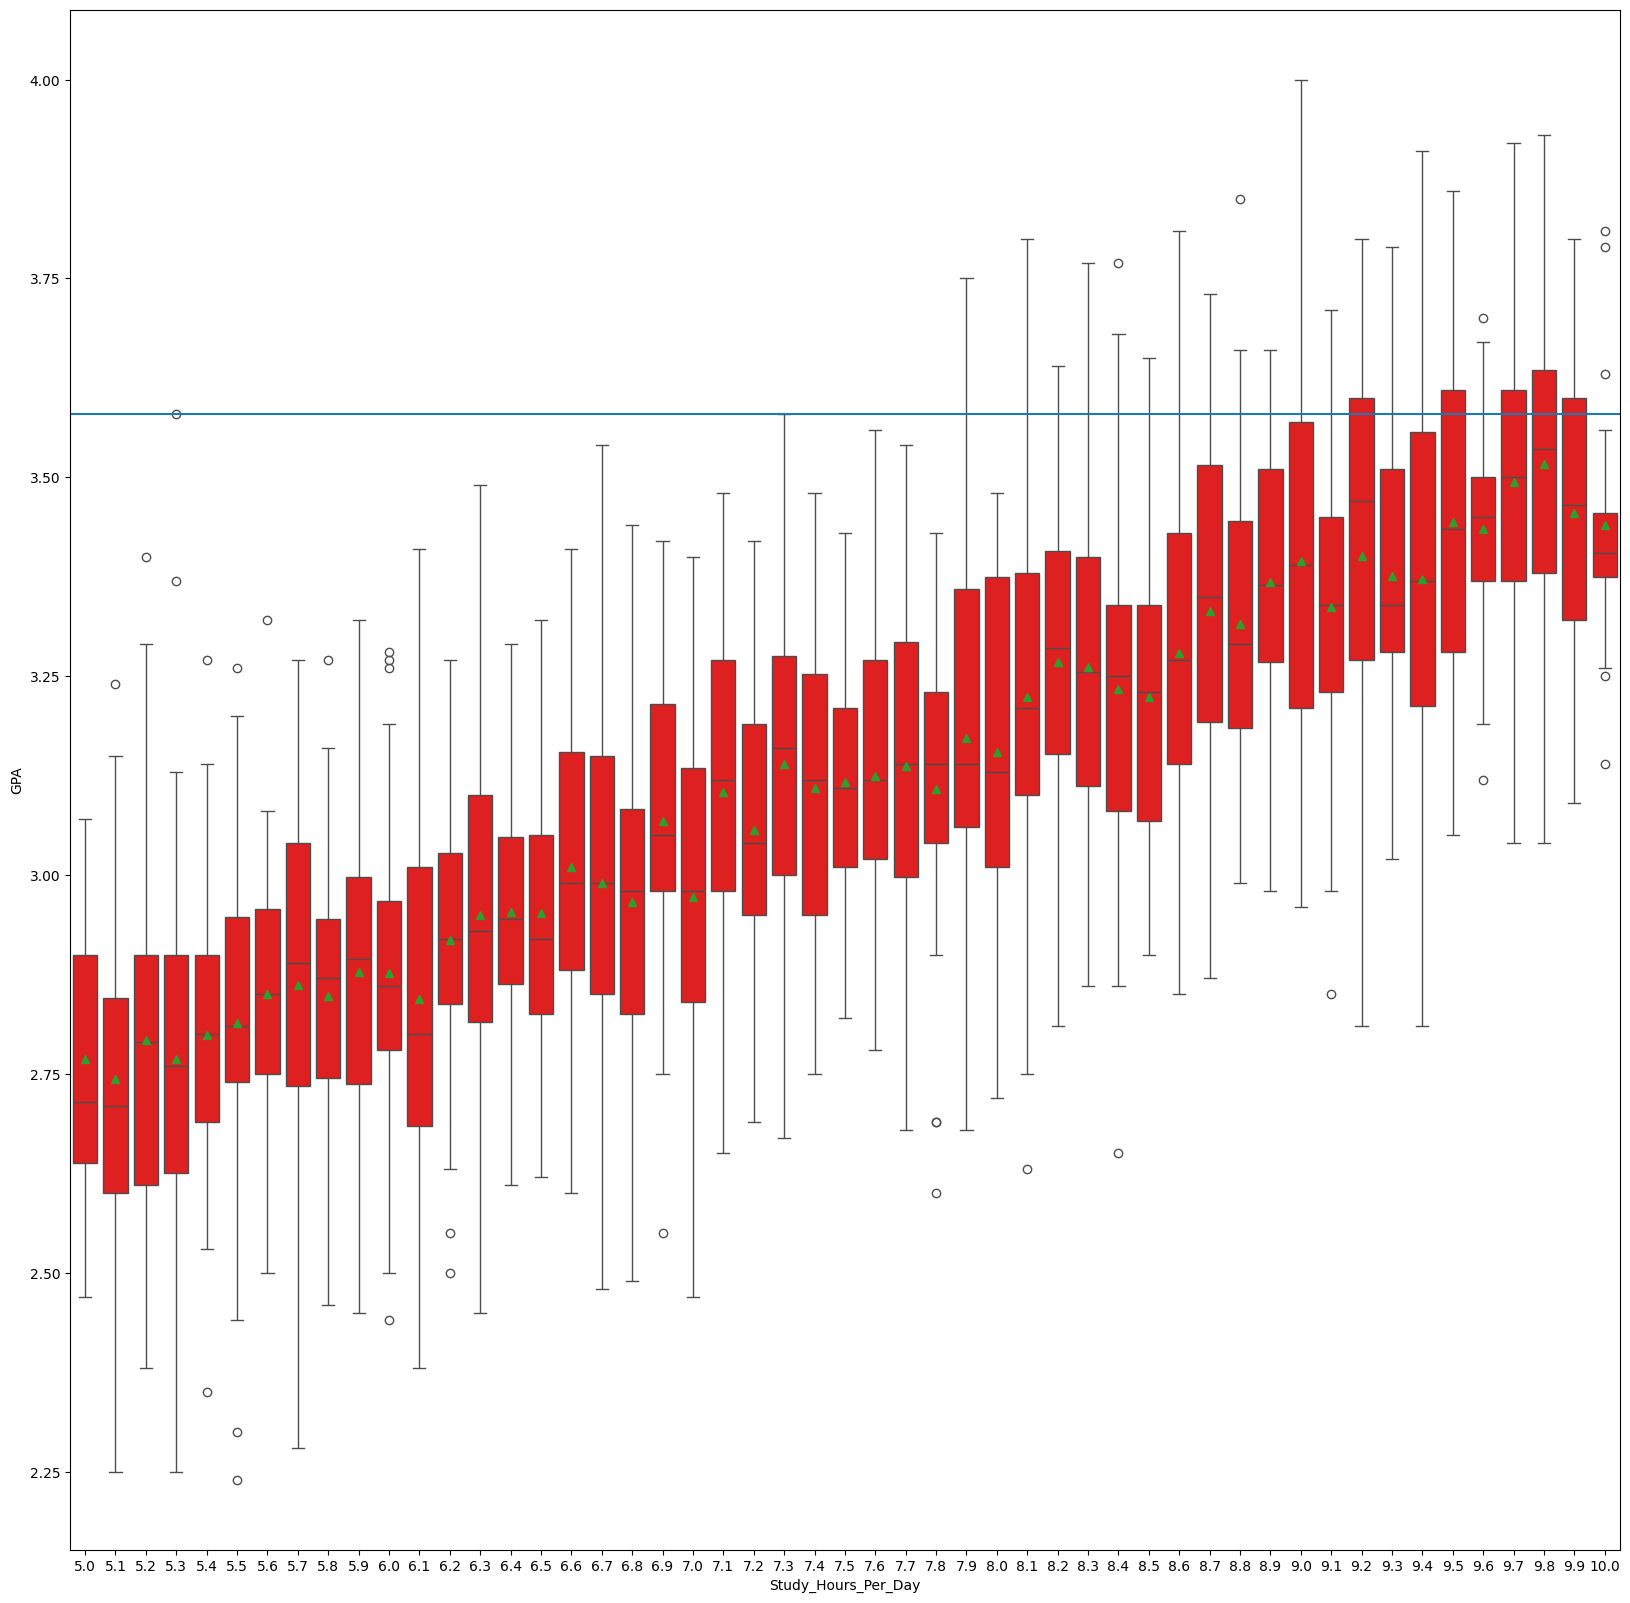

In [211]:
x = data[(data["Study_Hours_Per_Day"]==5.3) & (data["GPA"]>3.5)].sort_values(by="GPA",ascending=False)

fig,axes=plt.subplots(1,1,figsize=(20,20))
sns.boxplot(data=data,x='Study_Hours_Per_Day',y="GPA",color="red",showmeans=True,ax=axes)
plt.axhline(y=x.iloc[0]["GPA"])
plt.show()
#fig.savefig("best_student1")

<span style="font-size:30px">It's the same student!!!!!!!!!! (crazy outlier)</span>

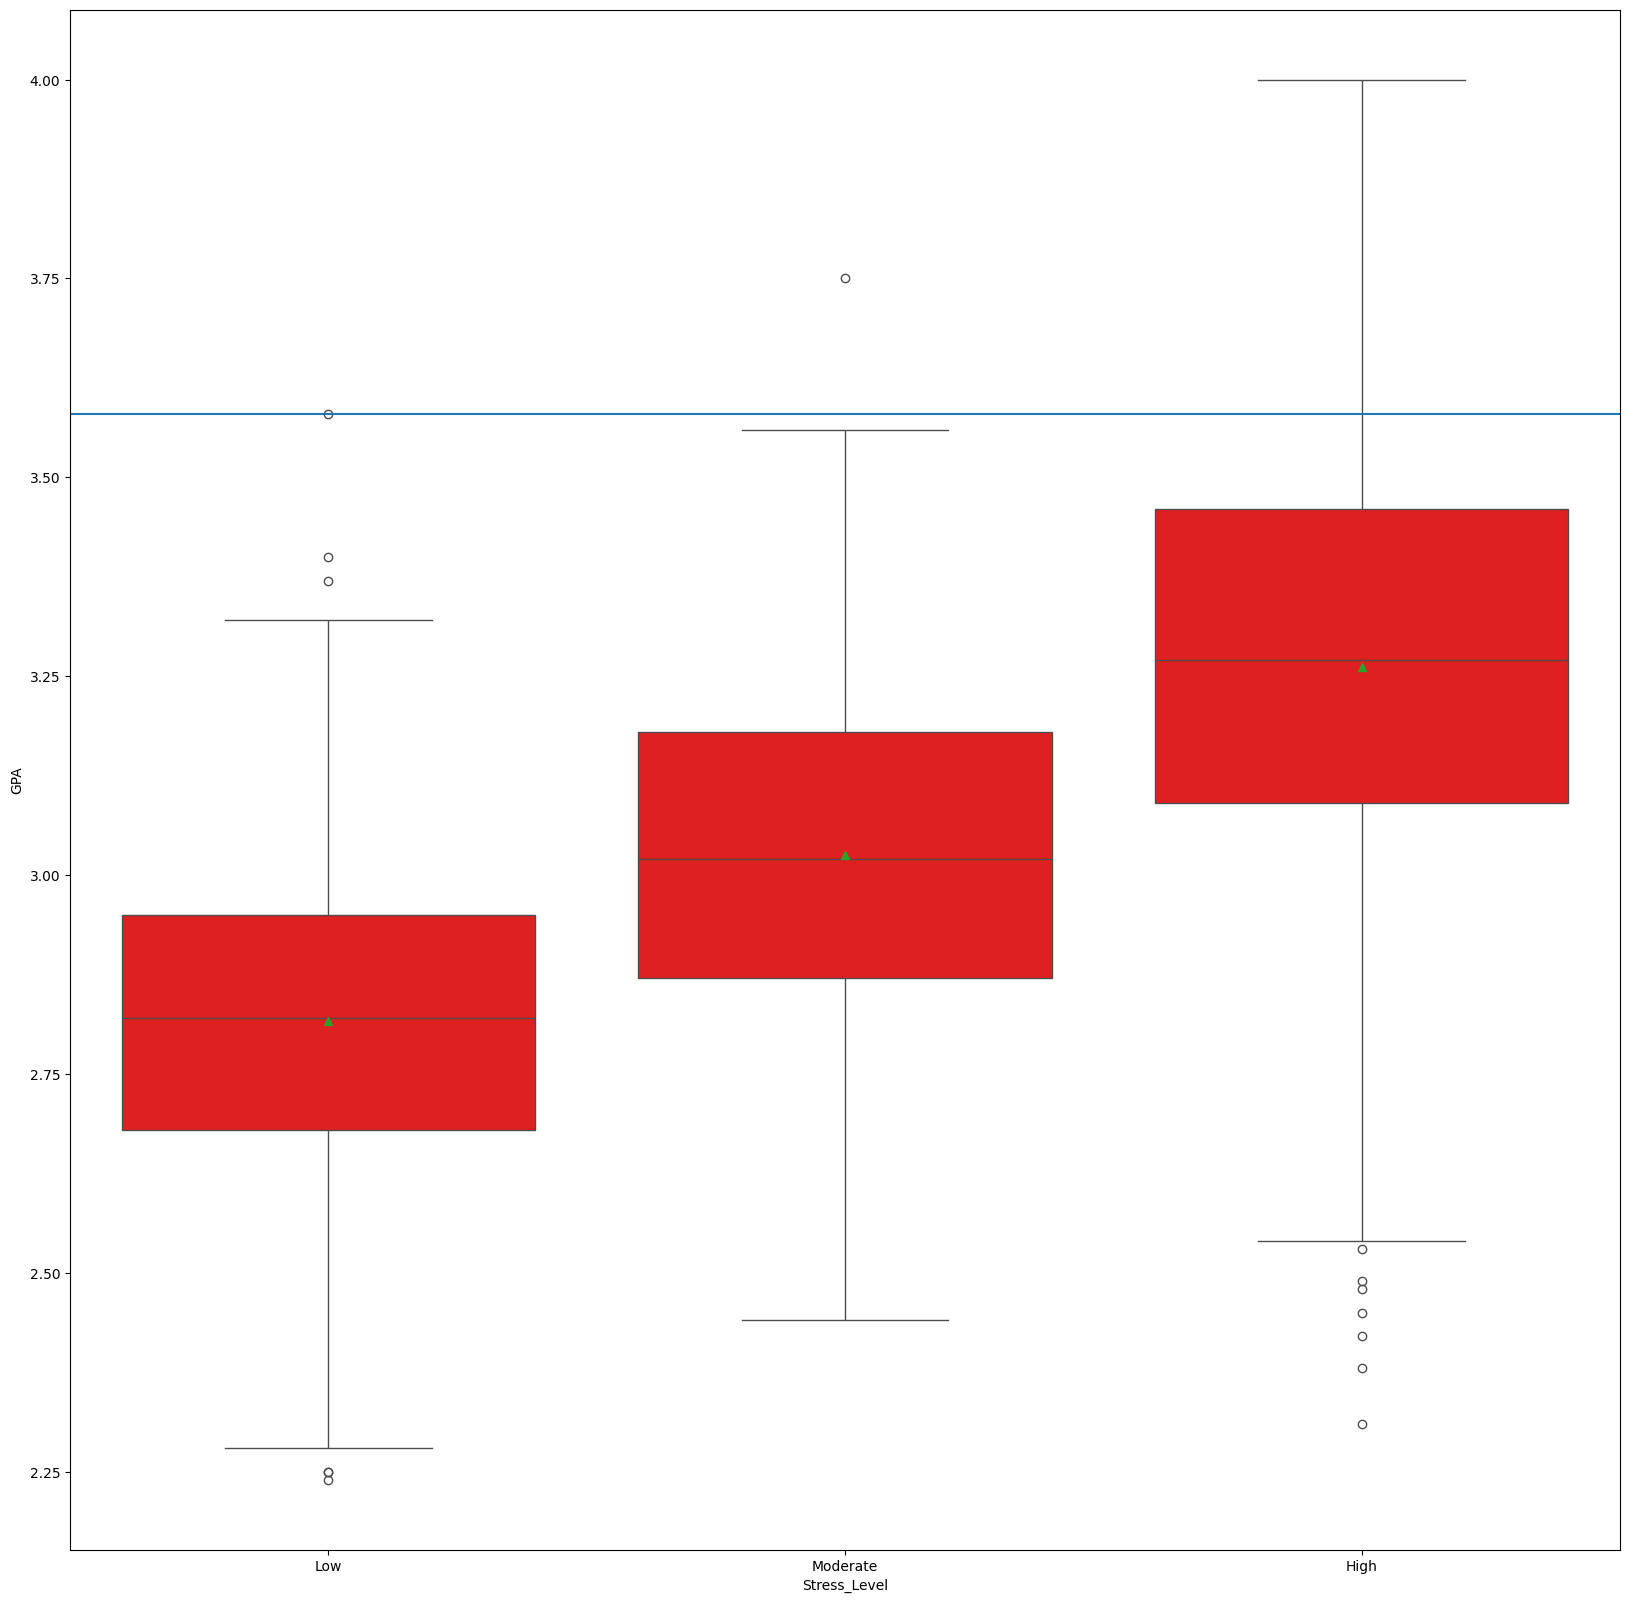

In [212]:
y = data[(data["Stress_Level"]=="Low") & (data["GPA"]>3.5)].sort_values(by="GPA",ascending=False)
#x = data[(data["Study_Hours_Per_Day"]==5.3) & (data["GPA"]>3)].sort_values(by="GPA",ascending=False)

fig,axes=plt.subplots(1,1,figsize=(20,20))
sns.boxplot(data=data,x='Stress_Level',y="GPA",color="red",showmeans=True,ax=axes)
plt.axhline(y=y.iloc[0]["GPA"])
plt.show()
#fig.savefig("best_student2")

<span style="font-size:40px">Let's start analyzing the Stress level</span>

<span style="font-size:25px">Basic info & encoding the data</span>

In [16]:
print(data["Stress_Level"].unique())
#saaaaad 

['Moderate' 'Low' 'High']


In [23]:
data2 = data.copy()
stress_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
data2['Stress_Level'] = data2['Stress_Level'].map(stress_mapping)
print(data2.head())

   Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  Sleep_Hours_Per_Day  \
0                  6.9                            3.8                  8.7   
1                  5.3                            3.5                  8.0   
2                  5.1                            3.9                  9.2   
3                  6.5                            2.1                  7.2   
4                  8.1                            0.6                  6.5   

   Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day   GPA  Stress_Level  
0                   2.8                              1.8  2.99             1  
1                   4.2                              3.0  2.75             0  
2                   1.2                              4.6  2.67             0  
3                   1.7                              6.5  2.88             1  
4                   2.2                              6.6  3.51             2  


<span style="font-size:25px">Pairplot showcasing Stress Levels</span>

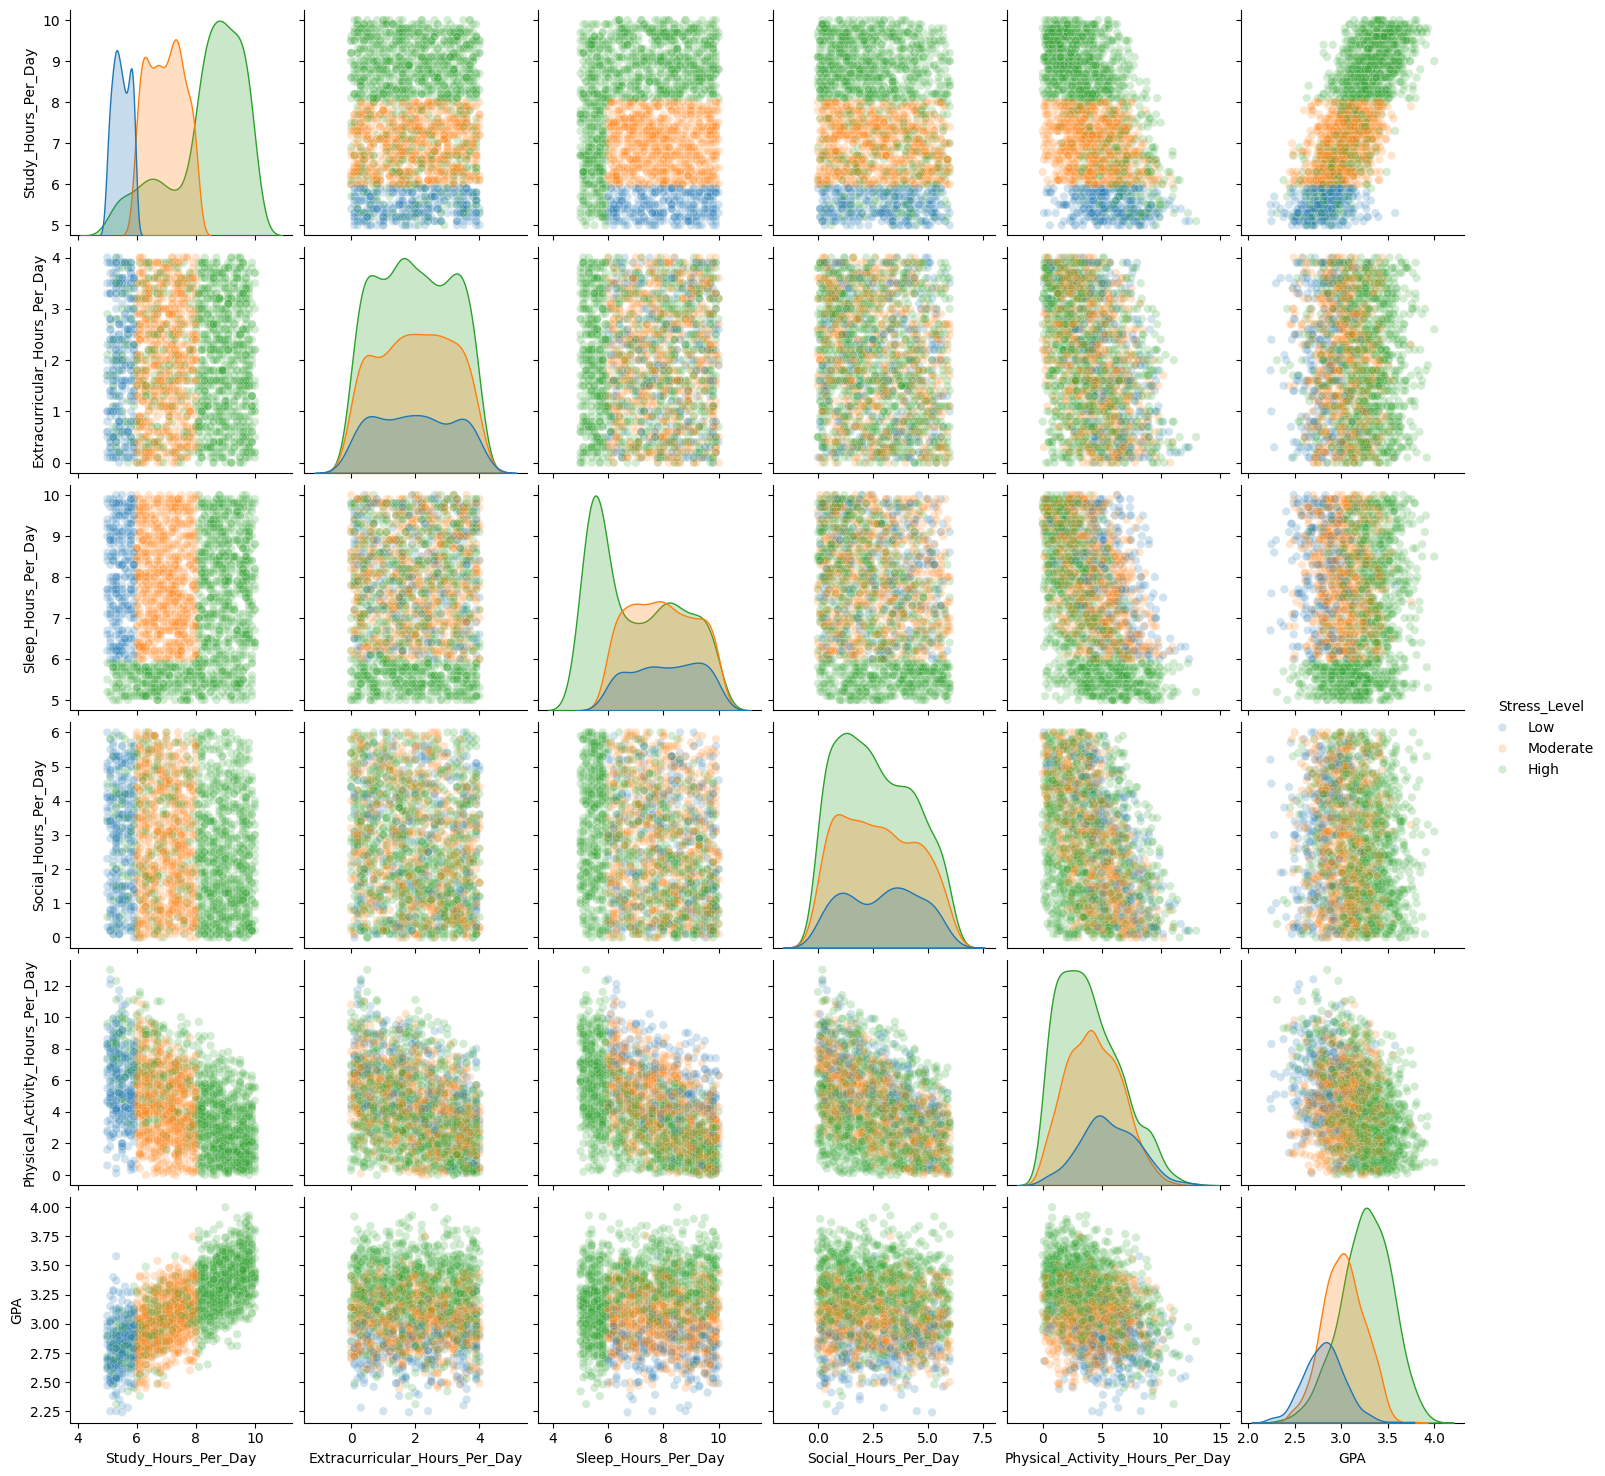

In [97]:
sns.pairplot(data=data,hue="Stress_Level",plot_kws={"alpha":0.2})
plt.show()

Study_Hours_Per_Day:
- the best feature
- The distributions of the three variables are distinctly separated, making it highly evident that the stress level can be effectively identified based on these variables.
- comparing with every feature we can see that the levels of stress are clustered and we can see some linear patterns with Physical_Activity_Hours_Per_Day & GPA

Sleep_Hours_Per_Day:
- Distribution separation stand out as having distinct pattern
- we can see linear regression with Physical_Activity_Hours_Per_Day but it's normal. When we sleep more we don't have time to socialize with our  busy schedule

Extracurricular_Hours_Per_Day:
- show less separation among stress levels, suggesting they might be less influential in predicting stress compared to variables like Sleep_Hours_Per_Day or GPA.

Physical_Activity_Hours_Per_Day:
- there is a linear pattern with GPA and we can clearly see come clusters


This suggests that individuals experiencing higher stress may actually be more academically driven or perform better academically, likely due to spending more time studying or feeling pressure to achieve high grades.
Or on the contrary they are experiencing higher stress, likely due to not spending enough time studying or perform badly.

To my suprise we cant see a correlation between Social_Hours_Per_Day & GPA, because they are 
distributed evenly


<span style="font-size:25px">Correlation Heatmap</span>

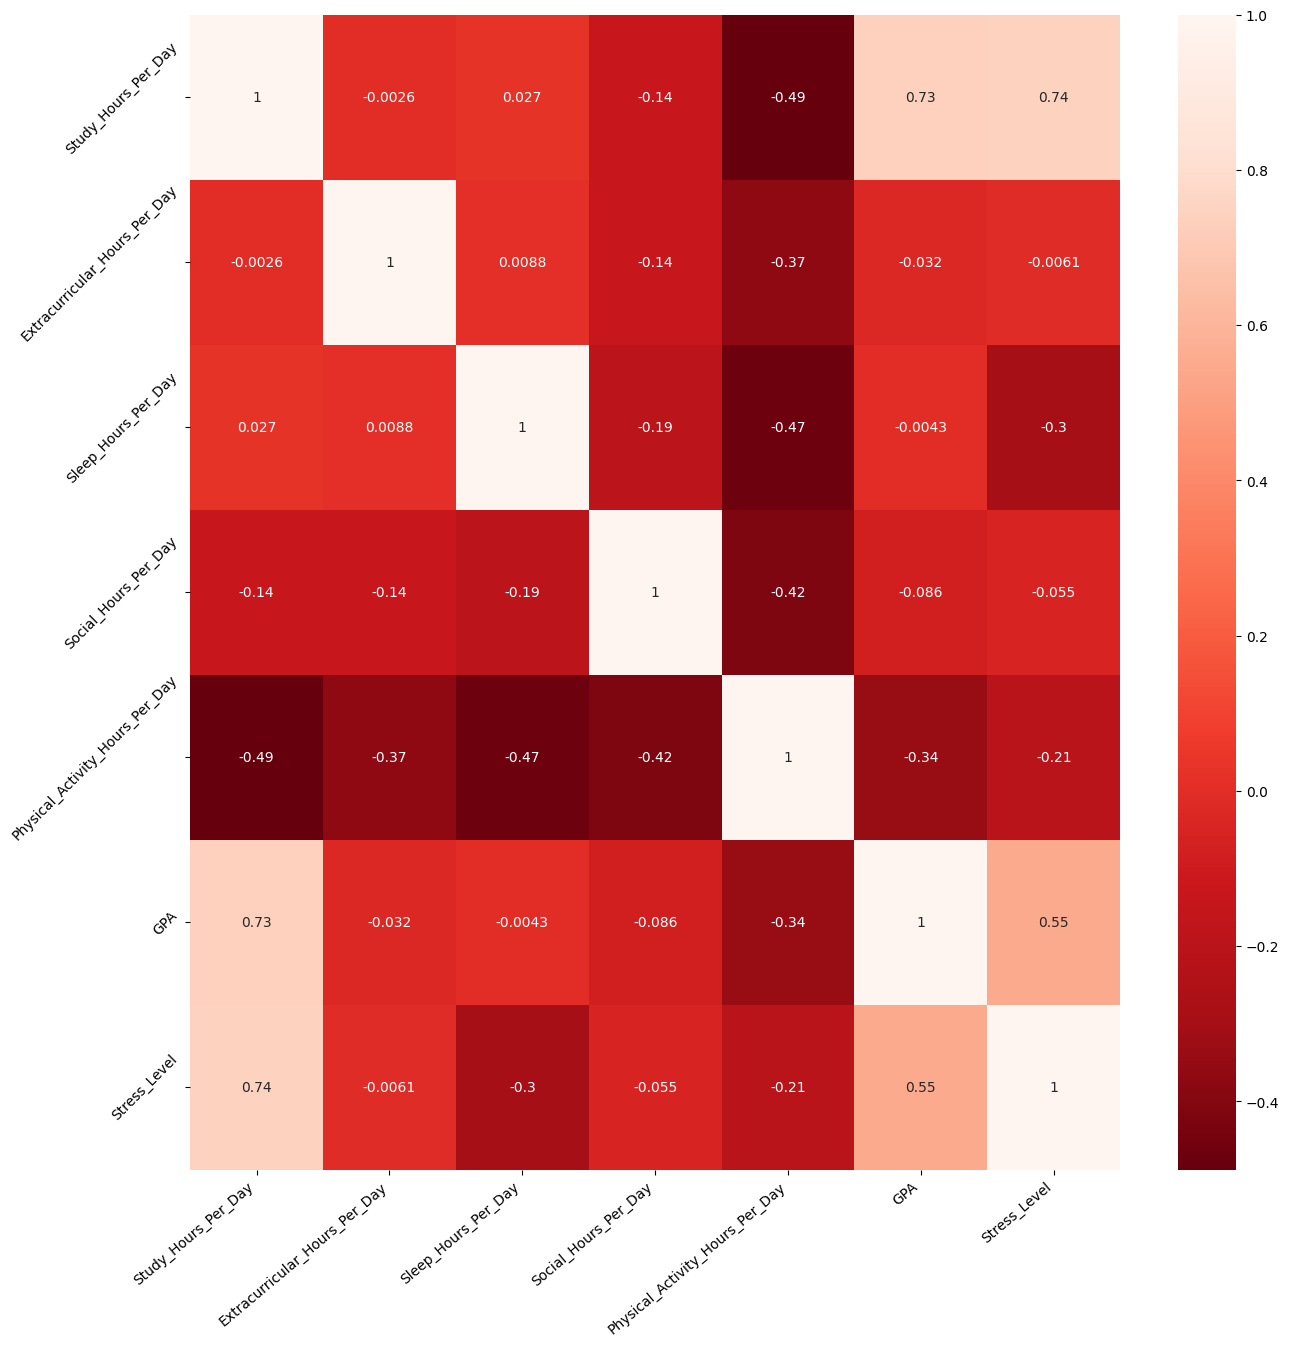

In [227]:
fig,axes = plt.subplots(1,1, figsize=(15,15))
corr_matrix = data2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r',ax=axes)
axes.set_xticklabels(axes.get_xticklabels(), rotation=40, horizontalalignment='right')
axes.set_yticklabels(axes.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.show()
fig.savefig("correlation")

<span style="font-size:25px">Boxplot & Stripplot</span>

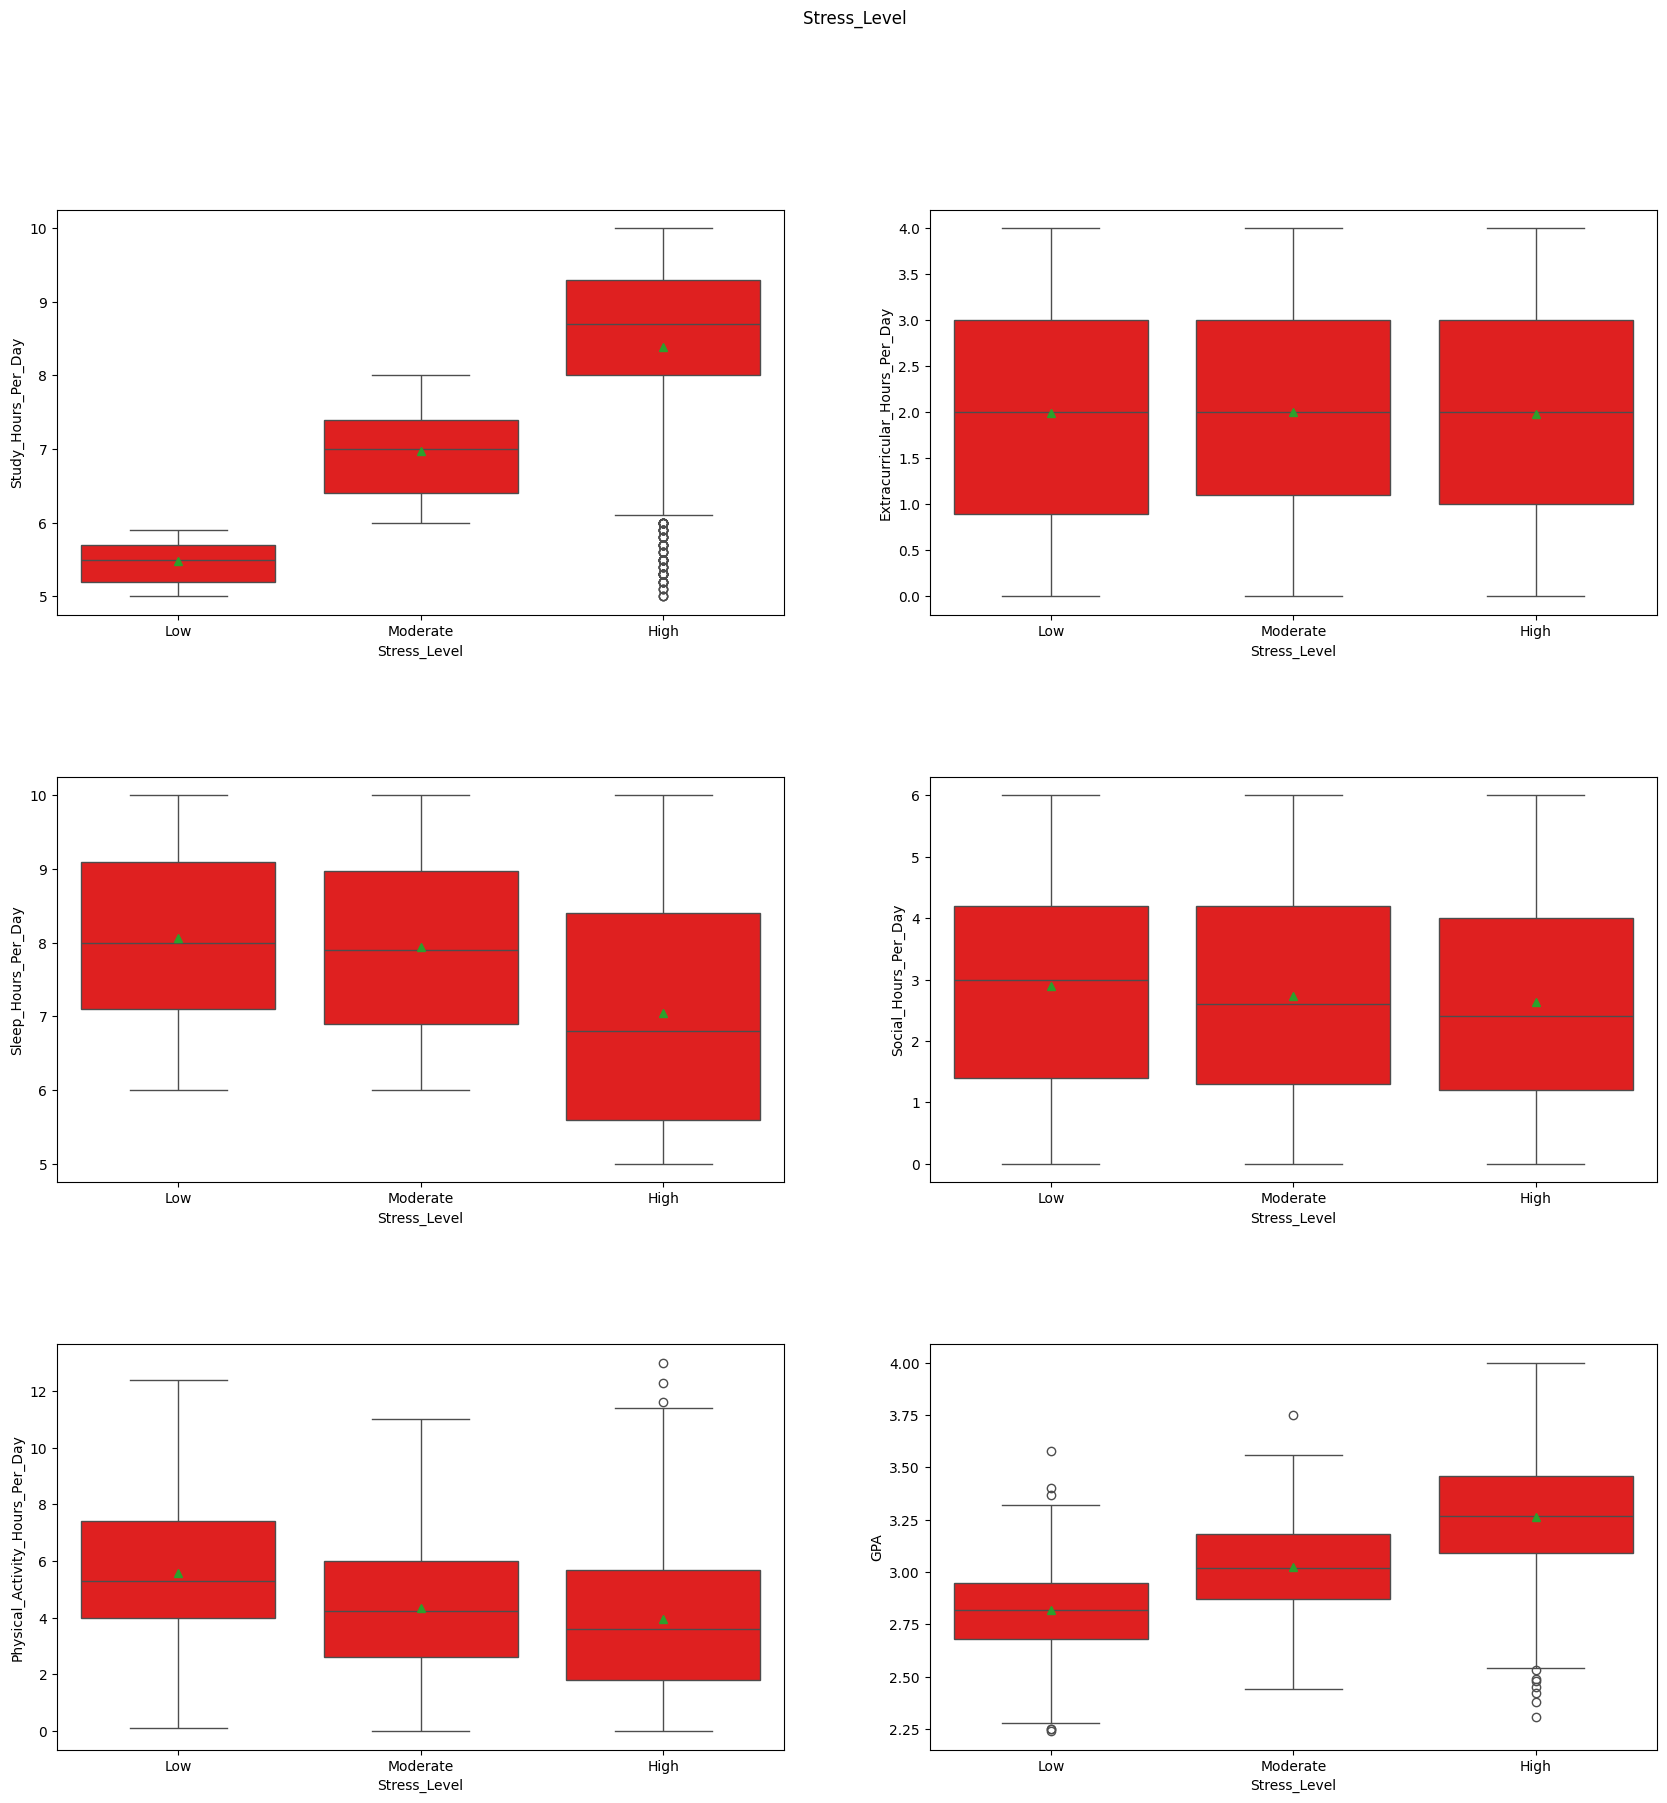

In [79]:
#feature importance model

order = ['Low', 'Moderate', 'High']
data['Stress_Level'] = pd.Categorical(data['Stress_Level'], categories=order, ordered=True)

fig,axes=plt.subplots(3,2,figsize=(20,20))
fig.suptitle("Stress_Level ")

for i,ax in enumerate(axes.flat):
    sns.boxplot(data=data,x='Stress_Level',y=data.columns[i],color="red",showmeans=True,ax=ax)
plt.subplots_adjust(left=0.1, right=0.9, hspace=0.4, wspace=0.2)


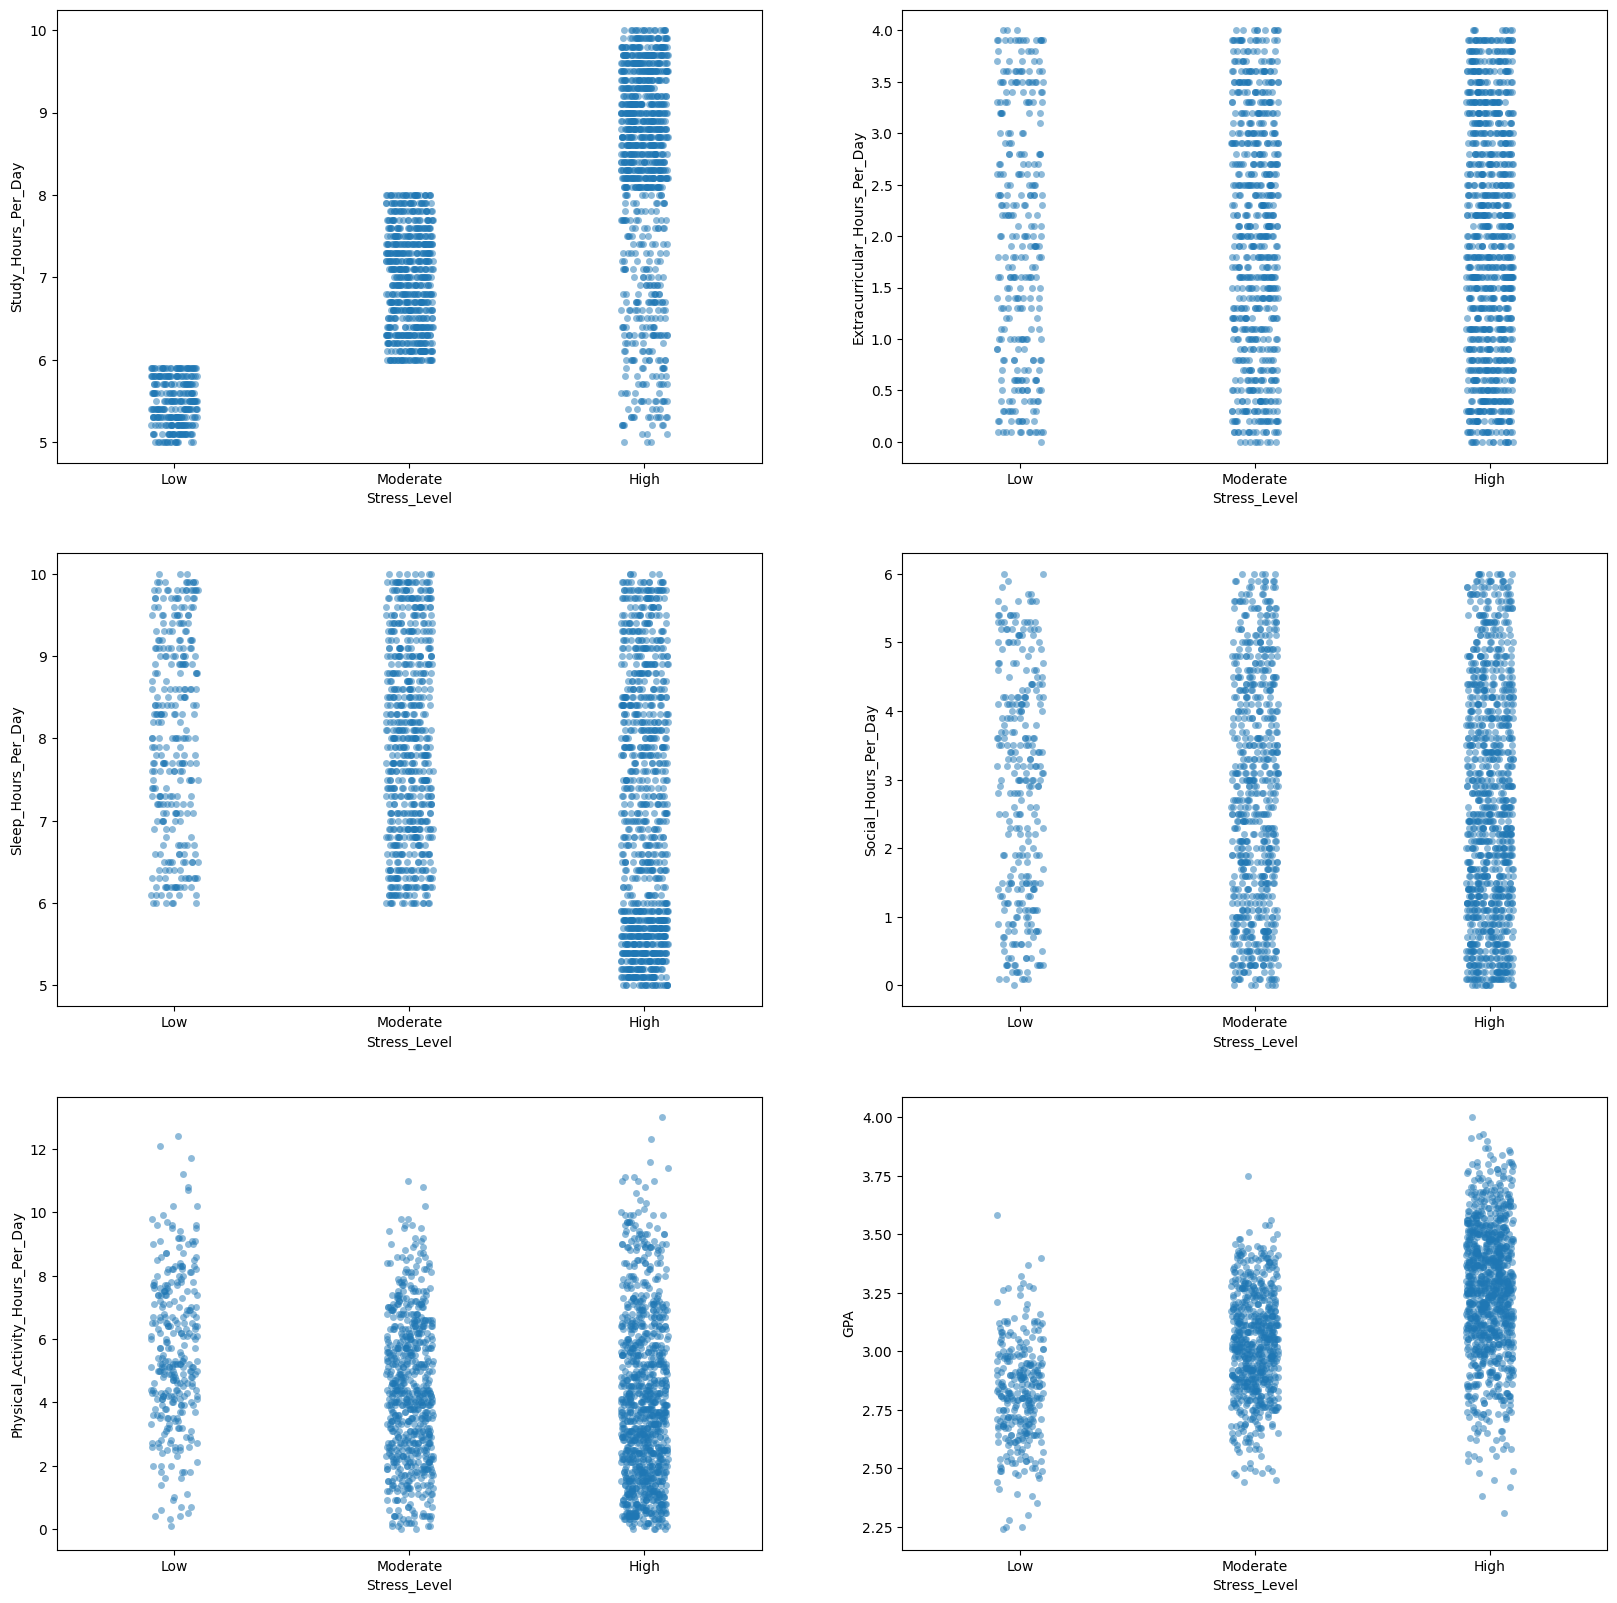

In [78]:
fig,axes=plt.subplots(3,2,figsize=(20,20))

for i,ax in enumerate(axes.flat):
    sns.stripplot(x='Stress_Level', y=data.columns[i], data=data, ax=ax,alpha=0.5)





<span style="font-size:20px">We can see some linear patterns, so i will try to do the Logistic Regression and see if the model is more accurate then the KNeighbors</span>




<span style="font-size:25px">Train & Test Split</span>

In [145]:
data2.columns

Index(['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

<span style="font-size:25px">Trying few models with not all features</span>

In [208]:
#we are trying to find stress_level

x = data2.drop("Stress_Level",axis=1)
y = data2["Stress_Level"]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


x2 = data2.drop(['Stress_Level','Extracurricular_Hours_Per_Day','Social_Hours_Per_Day'],axis=1)
y2 = data2["Stress_Level"]
X_train2,X_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.2)


x3 = data2.drop(['Stress_Level','Extracurricular_Hours_Per_Day','Social_Hours_Per_Day', 'Sleep_Hours_Per_Day'],axis=1)
y3 = data2["Stress_Level"]
X_train3,X_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size=0.2)



<span style="font-size:25px">Scaling the data</span>

In [199]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler2 = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

scaler3 = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train3)
X_test_scaled3 = scaler.transform(X_test3)


<span style="font-size:25px">KNeighborsClassifier & LogisticRegression</span>

In [200]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)


print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

print("####################################################")

lr = LogisticRegression()

lr.fit(X_train_scaled2, y_train2)
y_pred2 = lr.predict(X_test_scaled2)

print(accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2))

print("####################################################")
lr2 = LogisticRegression()

lr2.fit(X_train_scaled3, y_train3)
y_pred3 = lr2.predict(X_test_scaled3)

print(accuracy_score(y_test3,y_pred3))
print(classification_report(y_test3,y_pred3))

0.94
              precision    recall  f1-score   support

           0       0.98      0.80      0.88        55
           1       0.89      0.94      0.92       124
           2       0.96      0.97      0.97       221

    accuracy                           0.94       400
   macro avg       0.94      0.91      0.92       400
weighted avg       0.94      0.94      0.94       400

####################################################
0.8225
              precision    recall  f1-score   support

           0       0.85      0.94      0.90        50
           1       0.77      0.72      0.75       132
           2       0.84      0.86      0.85       218

    accuracy                           0.82       400
   macro avg       0.82      0.84      0.83       400
weighted avg       0.82      0.82      0.82       400

####################################################
0.815
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        67
     

<span style="font-size:25px">Searching for the best parameters</span>

In [201]:
param_grid ={'n_neighbors':range(1,31),
'weights': ['uniform','distance'],
'metric':['euclidean','manhattan','minkowski']}

param_grid2 = {
    'penalty': ['l1', 'l2'],
    'C': [0.01,0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

In [202]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3)

In [203]:
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=1)


logreg = LogisticRegression(max_iter=1000)
grid_search2 = GridSearchCV(logreg, param_grid2, cv=cv, scoring='accuracy')





In [204]:
print("Rozpoczynam dopasowanie GridSearchCV...")
grid_search.fit(X_train_scaled, y_train)
grid_search2.fit(X_train_scaled2, y_train2)
print("GridSearchCV zakończony.")
best_params=grid_search.best_params_
best_params2=grid_search2.best_params_
print(best_params)
print(best_params2)

Rozpoczynam dopasowanie GridSearchCV...
GridSearchCV zakończony.
{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


<span style="font-size:25px">Using the best parameters</span>

In [205]:
knn_tuned = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                  weights=best_params['weights'],
                                  metric=best_params['metric'])
knn_tuned.fit(X_train_scaled,y_train)

y_pred = knn_tuned.predict(X_test_scaled)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


lr_tuned = LogisticRegression(penalty=best_params2["penalty"],
    C=best_params2["C"],
    solver=best_params2["solver"])

lr_tuned.fit(X_train_scaled2,y_train2)

y_pred2 = lr_tuned.predict(X_test_scaled2)



print(accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2))








0.9325
              precision    recall  f1-score   support

           0       1.00      0.76      0.87        55
           1       0.89      0.92      0.90       124
           2       0.94      0.98      0.96       221

    accuracy                           0.93       400
   macro avg       0.94      0.89      0.91       400
weighted avg       0.93      0.93      0.93       400

0.83
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        50
           1       0.79      0.73      0.76       132
           2       0.84      0.87      0.86       218

    accuracy                           0.83       400
   macro avg       0.83      0.84      0.84       400
weighted avg       0.83      0.83      0.83       400



<span style="font-size:25px">Confusion Matrix for these parameters</span>

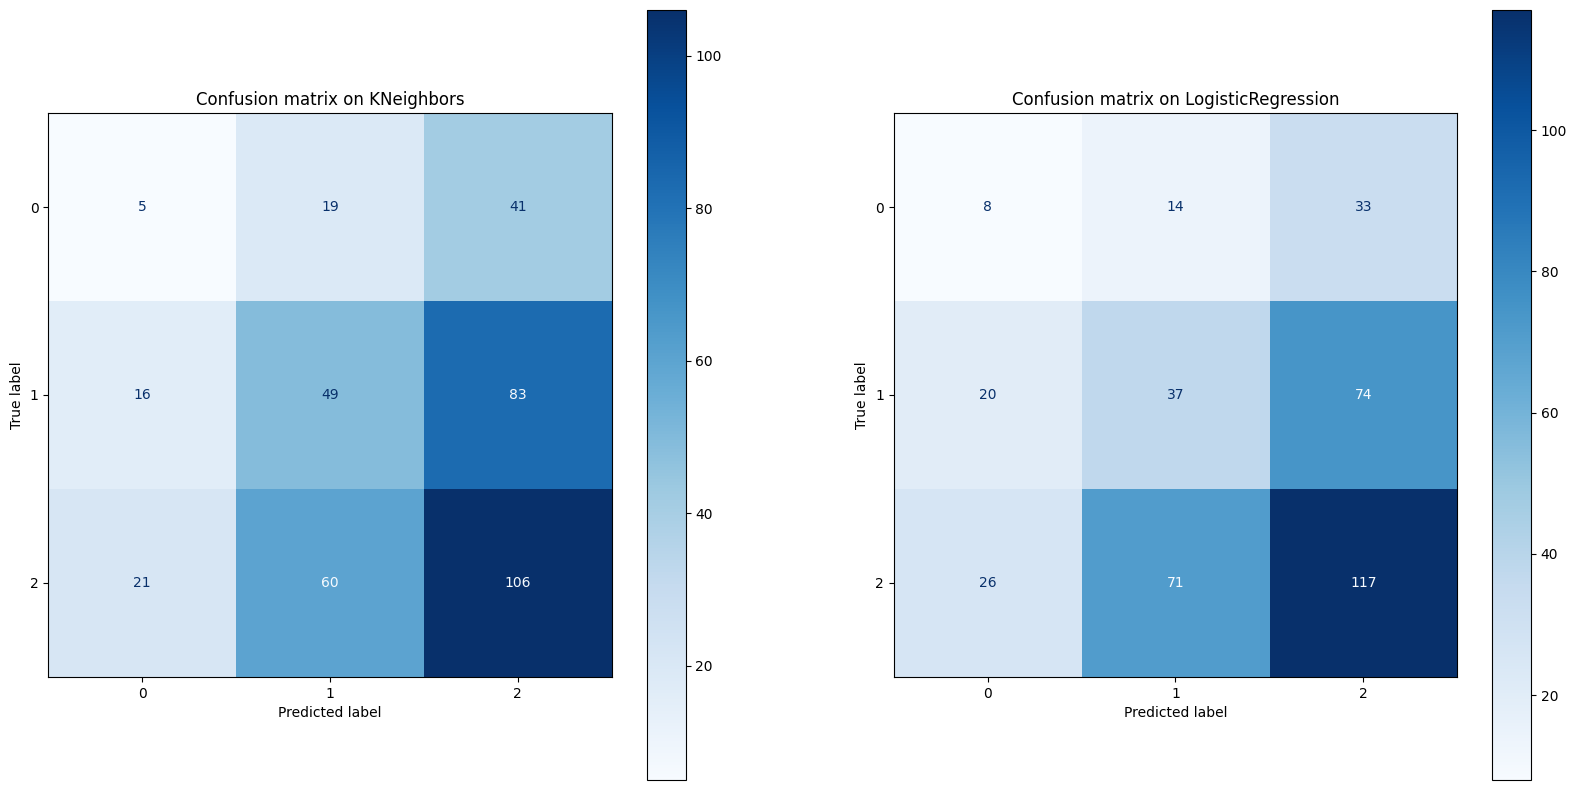

In [214]:
fig,axes = plt.subplots(1,2,figsize=(20,10))

cm = confusion_matrix(y_test,y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=grid_search.best_estimator_.classes_)
disp.plot(cmap=plt.cm.Blues,ax = axes[0])
axes[0].set_title("Confusion matrix on KNeighbors")


cm2 = confusion_matrix(y_test2,y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=grid_search2.best_estimator_.classes_)
disp2.plot(cmap=plt.cm.Blues,ax=axes[1])
axes[1].set_title("Confusion matrix on LogisticRegression")
plt.show()
#fig.savefig("confusion")




<span style="font-size:40px">It's awesome!!!!!!!!</span>

<span style="font-size:25px">Unfortunetly the logistic regresion isn't a good model, but our KNeighbors are giving us a 94% chance for predicting your stress level.</span>




<span style="font-size:40px">Thank you for your time :)</span>